In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [10]:
df = pd.read_csv('/content/Participant_Combined.csv')

#One-hot encode 'gender' and 'trait_anx_level'
df_encoded = pd.get_dummies(df, columns=['gender', 'trait_anx_level'])

# Drop non-numeric and zero-variance columns
df_encoded = df_encoded.select_dtypes(include='number')
df_encoded = df_encoded.loc[:, df_encoded.std() != 0]

# Compute correlation matrix
corr = df_encoded.corr()

# Replace NaNs with 0 (or you could use 1 if you want max distance)
corr.fillna(0, inplace=True)

# Compute condensed distance matrix from correlation
distance_matrix = 1 - corr
condensed_dist = squareform(distance_matrix, checks=False)

# Apply hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='average')


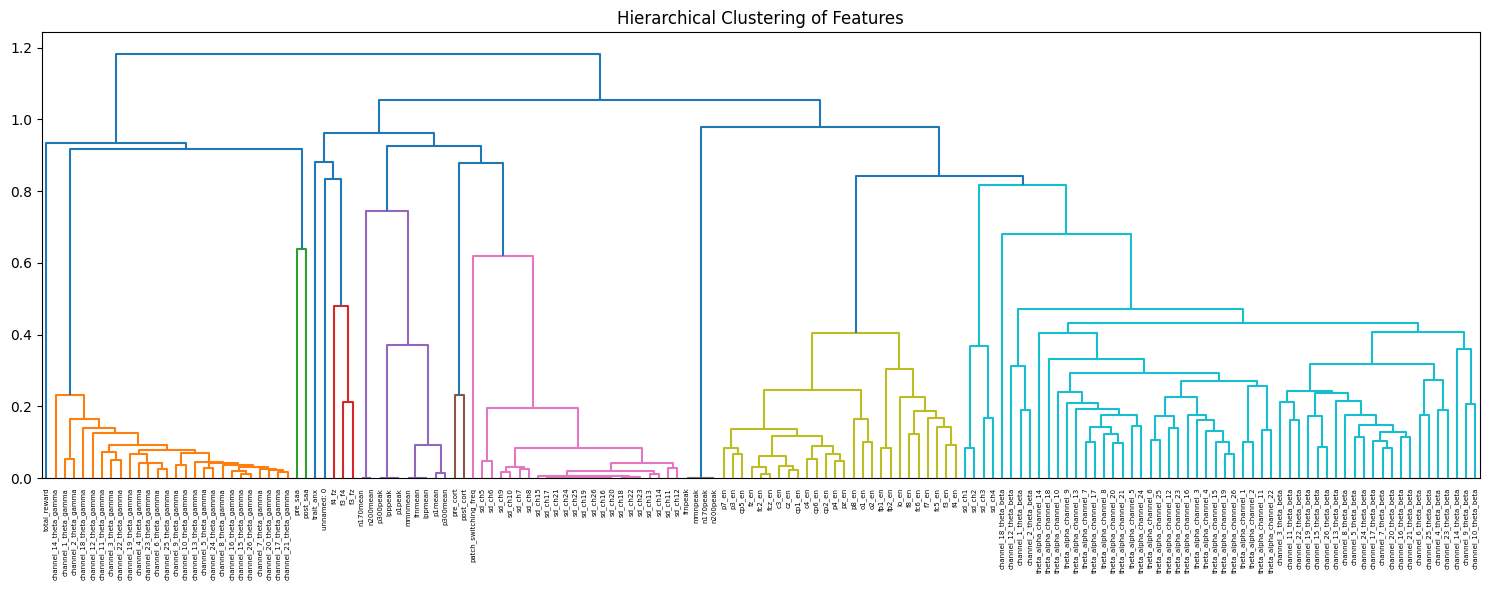

In [8]:
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering of Features')
plt.tight_layout()
plt.savefig('/content/feature_dendrogram.png', dpi=300)  # <-- Save the image
plt.show()

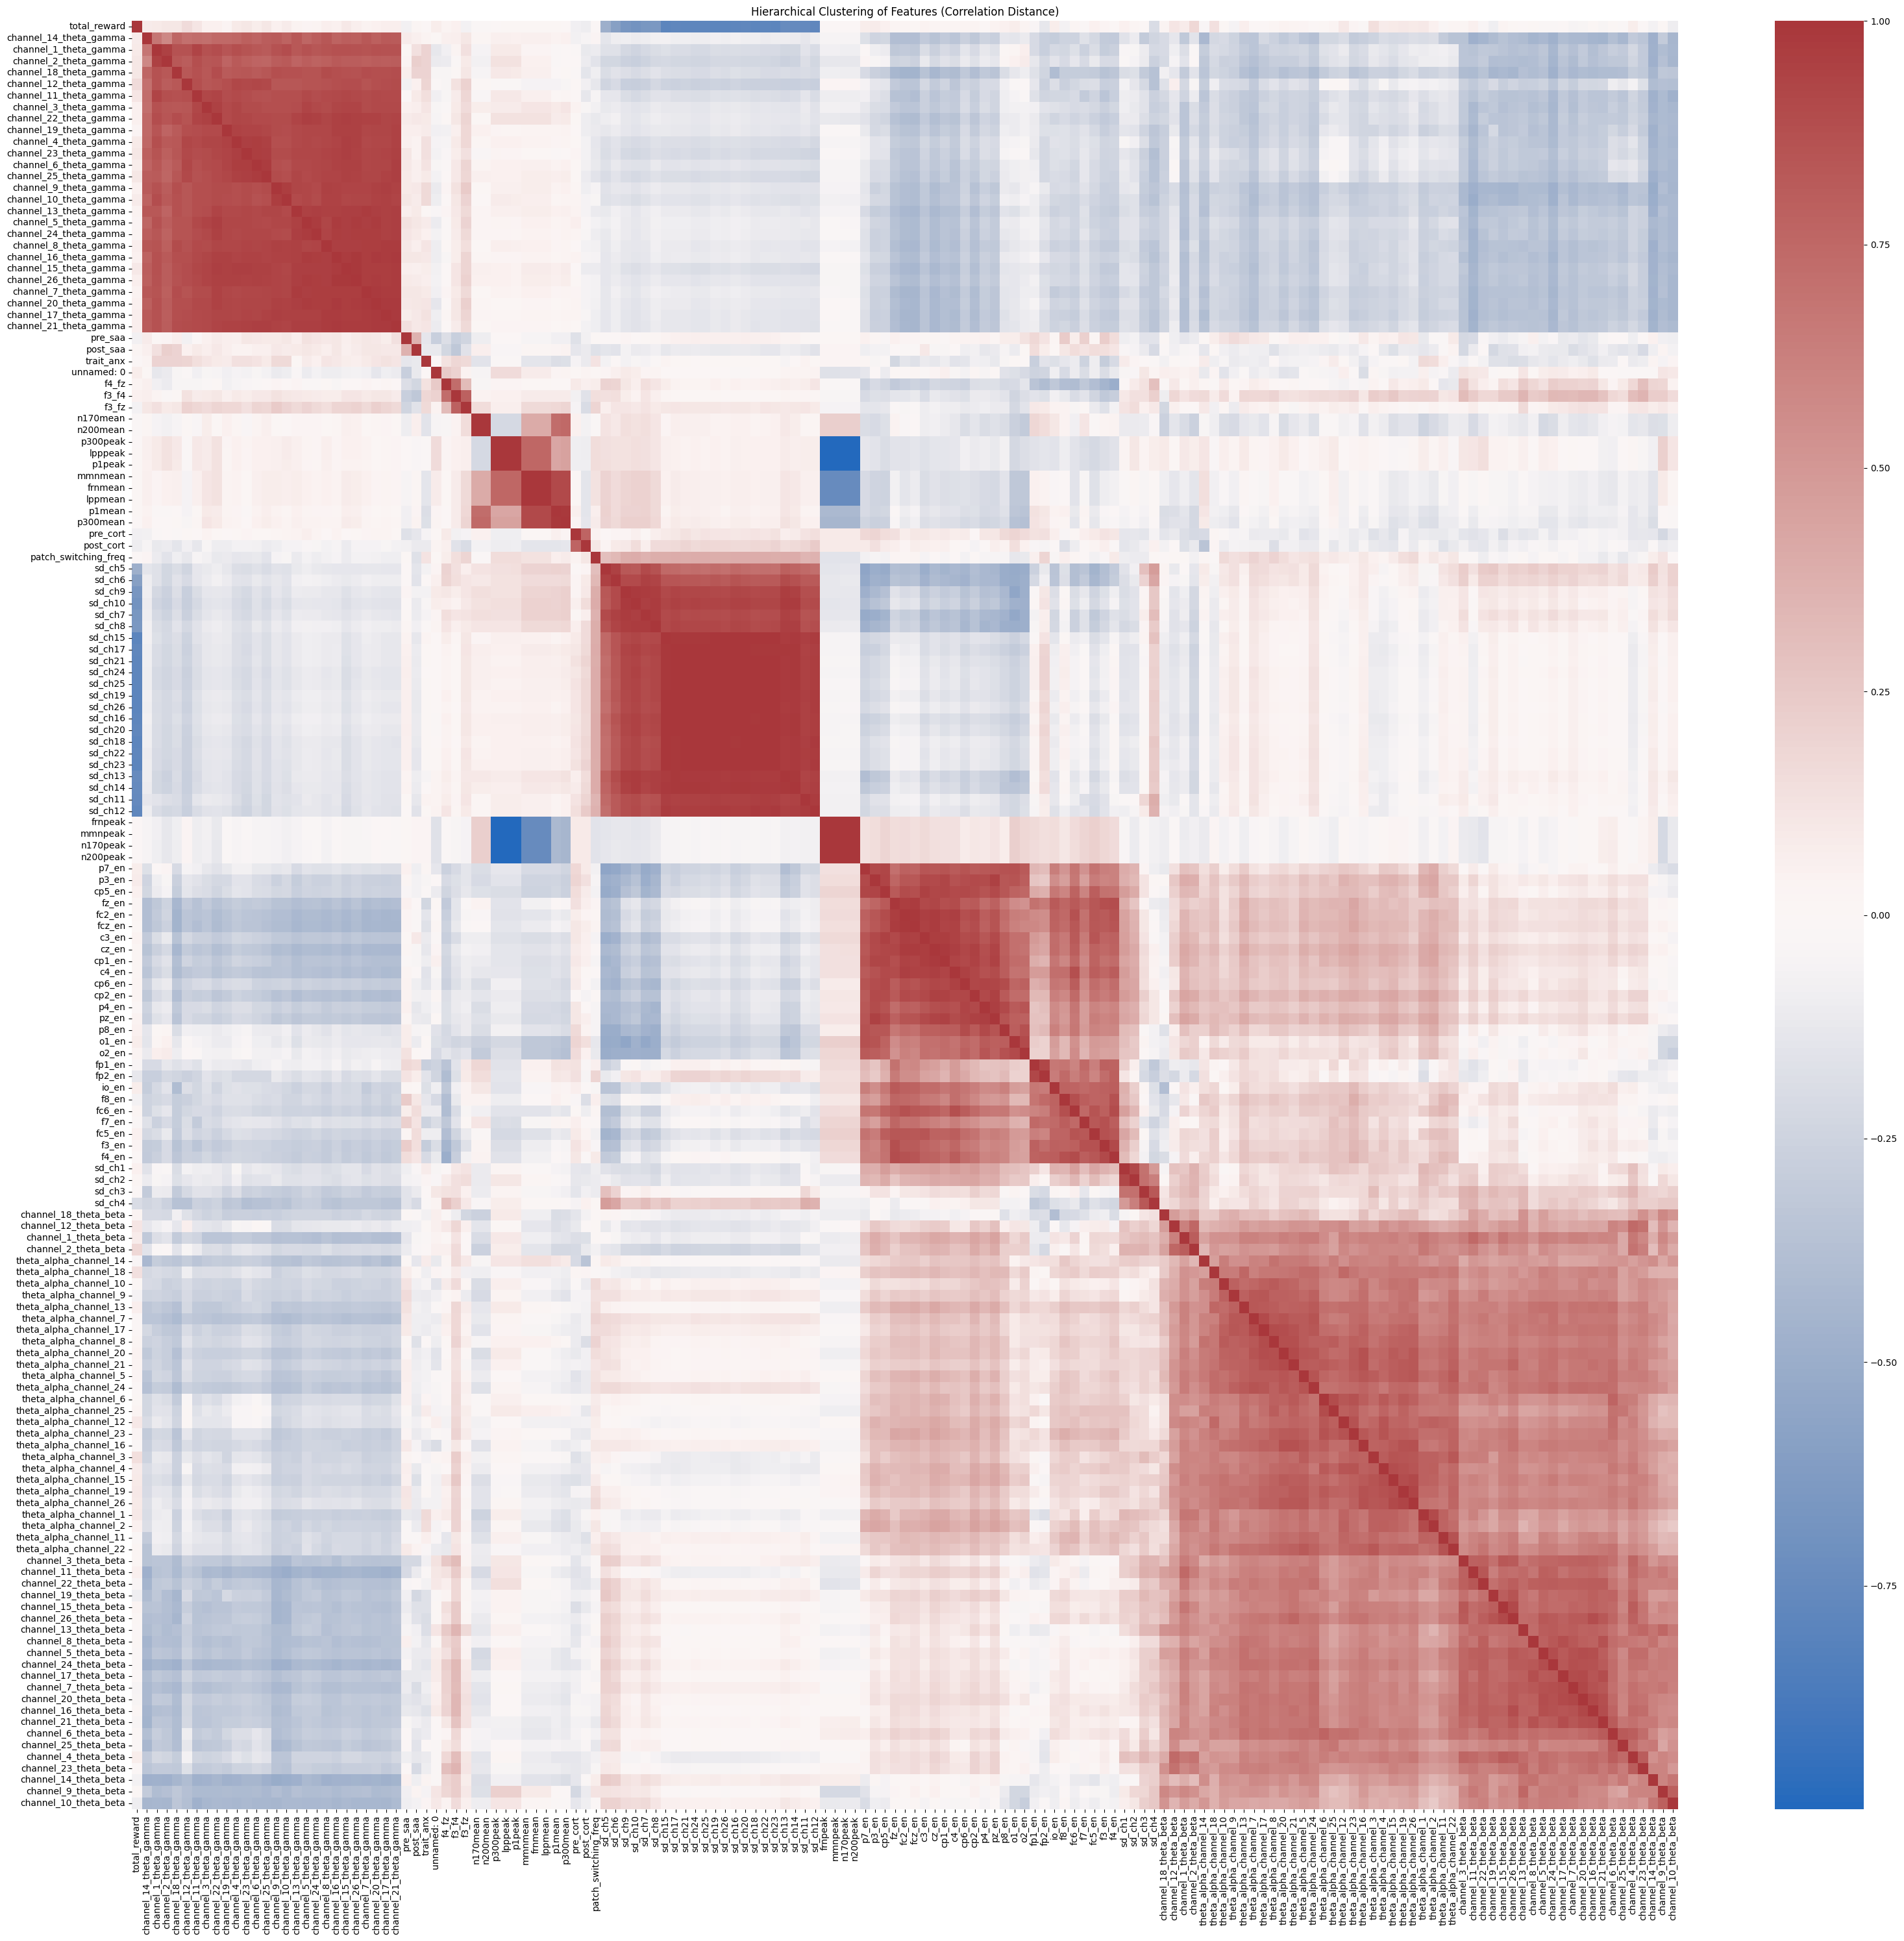

In [19]:
# Plot heatmap
plt.figure(figsize=(32, 30))
sns.heatmap(
    reordered_corr,
    xticklabels=reordered_corr.columns,
    yticklabels=reordered_corr.columns,
    cmap='vlag',
    center=0,
    annot=False
)
plt.title("Hierarchical Clustering of Features (Correlation Distance)")
plt.xticks(rotation=90)
plt.tight_layout()

# ✅ Save before showing
plt.savefig("feature_correlation_heatmap.png", dpi=300)

# Then show
plt.show()
